In [2]:
%lsmagic           # list available magics

Available line magics:
%aimport  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autoreload  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%jav

In [3]:
%matplotlib inline

In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%autoreload 2

In [13]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# see current working directory
%pwd
# list files in current folder (works on Windows)
!dir

 Volume in drive D is New Volume
 Volume Serial Number is C0EE-A097

 Directory of D:\Paypal Migration Project\Magic_commands_NB_migration

18-09-2025  17:13    <DIR>          .
18-09-2025  17:08    <DIR>          ..
18-09-2025  17:09    <DIR>          .ipynb_checkpoints
18-09-2025  17:13             9,173 Untitled.ipynb
               1 File(s)          9,173 bytes
               3 Dir(s)  193,035,456,512 bytes free


In [14]:
# 3) Prepare data folder & demo CSV (change path to your folder if needed)
DATA_DIR = Path(r"D:\my_jupyter_project\data")   # <- change to your path
DATA_DIR.mkdir(parents=True, exist_ok=True)
csv_path = DATA_DIR / "sample.csv"

# create a small demo CSV if not present
if not csv_path.exists():
    demo = pd.DataFrame({
        "id": range(1, 9),
        "value": [10, 20, 15, 30, 25, 40, 8, 12],
        "category": ["A","B","A","B","A","B","A","B"]
    })
    demo.to_csv(csv_path, index=False)
    print(f"Created demo CSV: {csv_path}")

# read CSV
df = pd.read_csv(csv_path)
df.head()

,id,value,category
0,1,10,A
1,2,20,B
2,3,15,A
3,4,30,B
4,5,25,A


In [15]:
# 4) Transformations + timing examples
# %time runs once and prints the time for the single statement
%time grouped = df.groupby("category").value.agg(["mean", "sum", "count"]).reset_index()
grouped

CPU times: total: 0 ns
Wall time: 2.73 ms


,category,mean,sum,count
0,A,14.5,58,4
1,B,25.5,102,4


In [16]:
# 5) Use %timeit to benchmark a function (runs repeatedly)
def compute_stats(df):
    return df.groupby("category").value.agg(["mean", "sum", "count"]).reset_index()

# -n controls number of loops, -r controls repeats; remove flags to use defaults
%timeit -n5 -r3 compute_stats(df)

918 µs ± 92.8 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


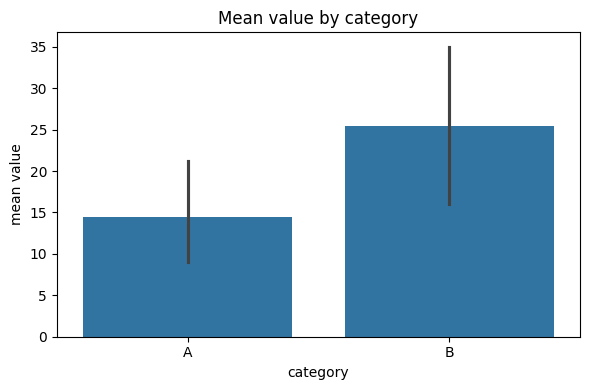

In [17]:
# 6) Plotting (matplotlib / seaborn)
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="category", y="value", estimator=np.mean)
plt.title("Mean value by category")
plt.ylabel("mean value")
plt.tight_layout()
plt.show()

In [19]:
def add_two_numbers(a,b) :
    c = a + b
    return c

In [20]:
result = add_two_numbers(1,2)
print(result)

3
